In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Model Training

In [2]:
train_data = pd.read_csv('train_data.csv').dropna()
train_data.head()

,Home_Team,Away_Team,Home_ELO,Away_ELO,Last_5_Home_Team_avgGoal,Last_5_Away_Team_avgGoal,Last_5_Home_Team_Home_avgGoal,Last_5_Away_Team_Away_avgGoal,Last_5_Home_Team_Home_avgGT,Last_5_Away_Team_Away_avgGT,Last_5_Home_Team_All_avgGT,Last_5_Away_Team_All_avgGT,Last_3_same_team_home_avgGT,Last_3_same_team_avgGT,Total_Goals,Home_Team_Points,Away_Team_Points
0,West Ham,Chelsea,74.0,80.0,0.8,0.8,1.2,1.4,2.6,4.0,2.2,3.2,0.000000,2.000000,3,35,49
1,Middlesbrough,Aston Villa,78.0,80.0,0.6,0.6,1.4,1.4,2.8,2.8,2.6,2.6,3.666667,3.333333,3,13,48
2,Charlton Athletic,Coventry City,69.0,78.0,1.6,1.6,1.4,1.0,1.8,3.2,3.2,2.2,0.000000,2.666667,4,8,1
3,Man. City,Liverpool,93.0,89.0,1.2,1.2,1.2,1.0,2.0,2.6,1.4,3.0,4.000000,3.000000,2,38,54
4,Southampton,Tottenham Hotspur,72.0,89.0,1.0,1.0,2.2,1.2,3.2,2.8,3.0,4.2,1.666667,1.666667,5,15,36


In [3]:
train_data['Total_Goals'].value_counts()

2     2294
3     2017
1     1710
4     1353
0      784
5      699
6      319
7      135
8       54
9       19
10       5
11       1
Name: Total_Goals, dtype: int64

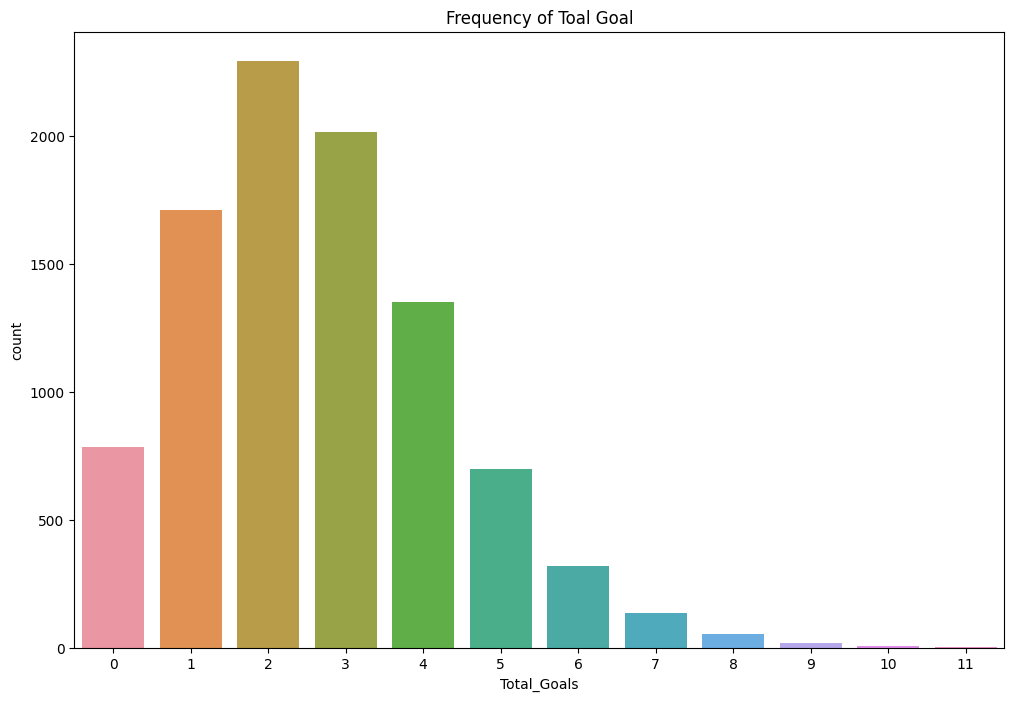

In [4]:
plt.figure(figsize=(12,8))
plt.title('Frequency of Toal Goal')
plt.xlabel('Total Goal')
plt.ylabel('Frequency')
sns.countplot(x=train_data['Total_Goals'])
plt.show()

In [5]:
le = pickle.load(open('labelencoder.pkl', 'rb'))
train_data['Home_Team'] = le.fit_transform(train_data['Home_Team'])
train_data['Away_Team'] = le.fit_transform(train_data['Away_Team'])

In [6]:
# Normalize Home_ELO and Away_ELO
train_data['Home_ELO'] = (train_data['Home_ELO'] - train_data['Home_ELO'].mean()) / (max(train_data['Home_ELO']) - min(train_data['Home_ELO']))
train_data['Away_ELO'] = (train_data['Away_ELO'] - train_data['Away_ELO'].mean()) / (max(train_data['Away_ELO']) - min(train_data['Away_ELO']))

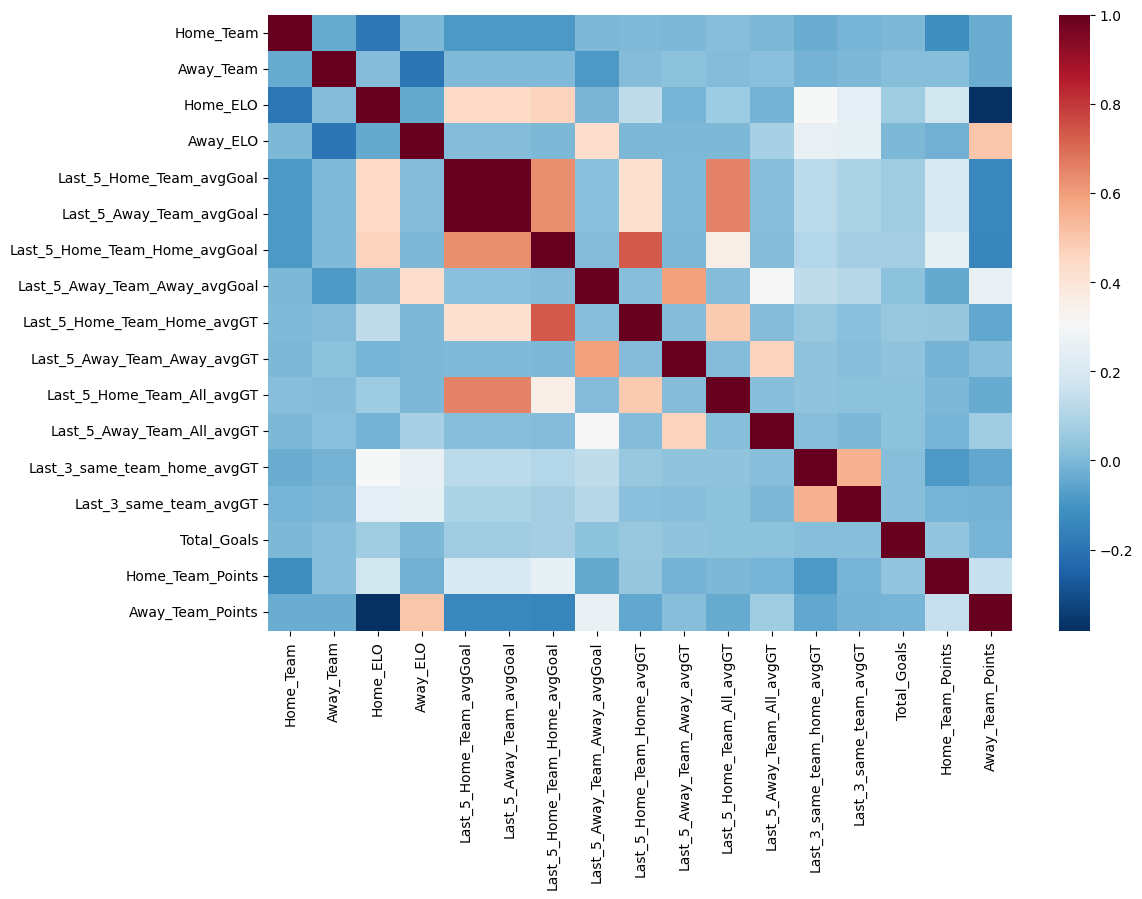

In [7]:
## correlation matrix
corr = train_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r')
plt.show()

In [8]:
## PCA on Total_Goals
from sklearn.decomposition import PCA
pca = PCA(n_components=len(train_data.columns) - 1)
pca.fit(train_data.drop('Total_Goals', axis=1))

PCA(n_components=16)

In [9]:
## sort the features by their importance
feature_importance = pd.DataFrame({'feature': train_data.drop('Total_Goals', axis=1).columns, 'importance': pca.explained_variance_ratio_})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
0,Home_Team,4.663434e-01
1,Away_Team,2.067486e-01
2,Home_ELO,1.894001e-01
3,Away_ELO,1.305927e-01
4,Last_5_Home_Team_avgGoal,2.813647e-03
5,Last_5_Away_Team_avgGoal,1.316279e-03
6,Last_5_Home_Team_Home_avgGoal,8.656430e-04
7,Last_5_Away_Team_Away_avgGoal,7.708043e-04
8,Last_5_Home_Team_Home_avgGT,3.929794e-04
9,Last_5_Away_Team_Away_avgGT,3.138591e-04


In [10]:
X = train_data.drop(['Total_Goals'], axis=1)
y = train_data['Total_Goals']

In [11]:
X = np.array(X)
y = np.array(y)

### Regression Models

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False],
}

grid = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid.fit(X, y)

print(grid.best_params_)

lr = grid.best_estimator_

In [ ]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid.fit(X, y)

print(grid.best_params_)

dtr = grid.best_estimator_

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [5, 10, 15]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid.fit(X, y)

print(grid.best_params_)

rfr = grid.best_estimator_

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
}

grid = GridSearchCV(GaussianProcessRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid.fit(X, y)

print(grid.best_params_)

gpr = grid.best_estimator_

In [ ]:
from sklearn.svm import SVR

param_grid = {
    'degree': [2, 4, 6],
    'C': [0.1, 1, 10]
}

grid = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid.fit(X, y)

print(grid.best_params_)

svr = grid.best_estimator_

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

param_grid = {
    'n_estimators': [10, 100, 1000],
    'learning_rate': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid.fit(X, y)

print(grid.best_params_)

abr = grid.best_estimator_

### Classification Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

grid.fit(X, y)

print(grid.best_params_)

dtc = grid.best_estimator_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [5, 10, 15]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

grid.fit(X, y)

print(grid.best_params_)

rfc = grid.best_estimator_

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'n_estimators': [10, 100, 1000],
    'learning_rate': [0.01, 0.1, 1, 10]
    }

grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, scoring='accuracy')

grid.fit(X, y)

print(grid.best_params_)

abc = grid.best_estimator_

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.01, 0.1, 1, 10],
    'n_estimators': [10, 100, 1000]
    }

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')

grid.fit(X, y)

print(grid.best_params_)

gbc = grid.best_estimator_

In [ ]:
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1]
}

grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')

grid.fit(X, y)

print(grid.best_params_)

gnb = grid.best_estimator_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid.fit(X, y)

print(grid.best_params_)

knc = grid.best_estimator_

### Model Comparison

In [ ]:
test_data = pd.read_csv('test_data.csv').dropna()
test_data.head()

In [ ]:
test_data['Home_Team'] = le.fit_transform(test_data['Home_Team'])
test_data['Away_Team'] = le.fit_transform(test_data['Away_Team'])

In [ ]:
test_data['Home_ELO'] = (test_data['Home_ELO'] - test_data['Home_ELO'].mean()) / (max(test_data['Home_ELO']) - min(test_data['Home_ELO']))
test_data['Away_ELO'] = (test_data['Away_ELO'] - test_data['Away_ELO'].mean()) / (max(test_data['Away_ELO']) - min(test_data['Away_ELO']))

In [ ]:
test_X = test_data.drop(['Total_Goals'], axis=1)
test_y = test_data['Total_Goals']

test_X = np.array(test_X)
test_y = np.array(test_y)

In [ ]:
## Accuracy Comparison

from sklearn.metrics import accuracy_score

prediction = lr.predict(test_X)
prediction = np.round(prediction)
lr_acc = accuracy_score(test_y, prediction)

prediction = dtr.predict(test_X)
prediction = np.round(prediction)
dt_acc = accuracy_score(test_y, prediction)

prediction = rfr.predict(test_X)
prediction = np.round(prediction)
rfr_acc = accuracy_score(test_y, prediction)

prediction = gpr.predict(test_X)
prediction = np.round(prediction)
gpr_acc = accuracy_score(test_y, prediction)

prediction = svr.predict(test_X)
prediction = np.round(prediction)
svr_acc = accuracy_score(test_y, prediction)

prediction = abr.predict(test_X)
prediction = np.round(prediction)
abr_acc = accuracy_score(test_y, prediction)


dtc_acc = accuracy_score(test_y, dtc.predict(test_X))
rfc_acc = accuracy_score(test_y, rfc.predict(test_X))
abc_acc = accuracy_score(test_y, abc.predict(test_X))
gbc_acc = accuracy_score(test_y, gbc.predict(test_X))
gnb_acc = accuracy_score(test_y, gnb.predict(test_X))
knn_acc = accuracy_score(test_y, knc.predict(test_X))


## Plot MSE
model_names = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GaussianRegressor', 'SupportVectorRegressor', 'AdaBoostRegressor', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'GaussianNB', 'KNeighborsClassifier']
model_acc = [lr_acc, dt_acc, rfr_acc, gpr_acc, svr_acc, abr_acc, dtc_acc, rfc_acc, abc_acc, gbc_acc, gnb_acc, knn_acc]

plt.figure(figsize=(30, 15))
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
sns.barplot(x=model_names, y=model_acc)
plt.show()

In [ ]:
## F1 Score Comparison

from sklearn.metrics import f1_score

prediction = lr.predict(test_X)
prediction = np.round(prediction)
lr_f1 = f1_score(test_y, prediction, average='weighted')

prediction = dtr.predict(test_X)
prediction = np.round(prediction)
dt_f1 = f1_score(test_y, prediction, average='weighted')

prediction = rfr.predict(test_X)
prediction = np.round(prediction)
rfr_f1 = f1_score(test_y, prediction, average='weighted')

prediction = gpr.predict(test_X)
prediction = np.round(prediction)
gpr_f1 = f1_score(test_y, prediction, average='weighted')

prediction = svr.predict(test_X)
prediction = np.round(prediction)
svr_f1 = f1_score(test_y, prediction, average='weighted')

prediction = abr.predict(test_X)
prediction = np.round(prediction)
abr_f1 = f1_score(test_y, prediction, average='weighted')

dtc_f1 = f1_score(test_y, dtc.predict(test_X), average='weighted')
rfc_f1 = f1_score(test_y, rfc.predict(test_X), average='weighted')
abc_f1 = f1_score(test_y, abc.predict(test_X), average='weighted')
gbc_f1 = f1_score(test_y, gbc.predict(test_X), average='weighted')
gnb_f1 = f1_score(test_y, gnb.predict(test_X), average='weighted')
knn_f1 = f1_score(test_y, knc.predict(test_X), average='weighted')

model_names = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GaussianRegressor', 'SupportVectorRegressor', 'AdaBoostRegressor', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'GaussianNB', 'KNeighborsClassifier']
model_f1 = [lr_f1, dt_f1, rfr_f1, gpr_f1, svr_f1, abr_f1, dtc_f1, rfc_f1, abc_f1, gbc_f1, gnb_f1, knn_f1]

plt.figure(figsize=(30, 15))
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
sns.barplot(x=model_names, y=model_f1)
plt.show()

In [ ]:
best_model = model_names[np.argmax(model_acc)]